In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001


train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [2]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [3]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)



torch.Size([100, 1, 28, 28]) torch.Size([100])


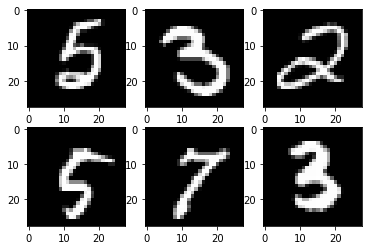

In [11]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()  

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self,input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.functional.relu
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

model = NeuralNet(input_size, hidden_size, num_classes)    


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i,(images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [1/600], Loss: 2.2876
Epoch [1/2], Step [2/600], Loss: 2.2220
Epoch [1/2], Step [3/600], Loss: 2.2080
Epoch [1/2], Step [4/600], Loss: 2.1728
Epoch [1/2], Step [5/600], Loss: 2.0941
Epoch [1/2], Step [6/600], Loss: 2.0781
Epoch [1/2], Step [7/600], Loss: 2.0024
Epoch [1/2], Step [8/600], Loss: 1.9611
Epoch [1/2], Step [9/600], Loss: 1.9535
Epoch [1/2], Step [10/600], Loss: 1.8720
Epoch [1/2], Step [11/600], Loss: 1.8749
Epoch [1/2], Step [12/600], Loss: 1.7637
Epoch [1/2], Step [13/600], Loss: 1.7655
Epoch [1/2], Step [14/600], Loss: 1.7125
Epoch [1/2], Step [15/600], Loss: 1.6039
Epoch [1/2], Step [16/600], Loss: 1.6193
Epoch [1/2], Step [17/600], Loss: 1.5236
Epoch [1/2], Step [18/600], Loss: 1.6088
Epoch [1/2], Step [19/600], Loss: 1.4497
Epoch [1/2], Step [20/600], Loss: 1.4193
Epoch [1/2], Step [21/600], Loss: 1.4807
Epoch [1/2], Step [22/600], Loss: 1.2609
Epoch [1/2], Step [23/600], Loss: 1.3127
Epoch [1/2], Step [24/600], Loss: 1.2640
Epoch [1/2], Step [25/600

In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)  #1 indicates return max of row # predicted will store index of the label having highest probability
    n_samples += labels.size(0)  
    n_correct += (predicted==labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy of the network on the 10000 test images: {acc} %')


Accuracy of the network on the 10000 test images: 95.42 %
